## Generate Static Graphs

These are the input parameters for the notebook. They will be automatically changed when the scripts to generate monthly statistics are run. You can modify them manually to generate multiple plots locally as well.

Pass in `None` to remove the filters and plot all data. This is not recommended for production settings, but might be useful for reports based on data snapshots.

In [18]:
year = 2021
month = 9
program = "prepilot"
study_type = None

In [19]:
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import emission.core.get_database as edb
import emission.core.wrapper.entry as ecwe
import emission.storage.decorations.analysis_timeseries_queries as esda
import emission.storage.decorations.trip_queries as esdt
import emission.storage.decorations.timeline as esdl
import emission.storage.timeseries.abstract_timeseries as esta
import emission.storage.timeseries.timequery as estt
from plots import *
import scaffolding
from uuid import UUID

sns.set_style("whitegrid")
sns.set()
%matplotlib inline

In [20]:
# Loading mapping dictionaries from mapping_dictionaries notebook
%store -r df_ei
%store -r dic_re
%store -r dic_pur
%store -r dic_fuel

# convert a dictionary to a defaultdict
dic_re = defaultdict(lambda: 'Other',dic_re)
dic_pur = defaultdict(lambda: 'Other',dic_pur)
dic_fuel = defaultdict(lambda: 'Other',dic_fuel)

## Collect Data From Database

In [21]:
tq = scaffolding.get_time_query(year, month)
participant_ct_df = scaffolding.load_all_participant_trips(program, tq)
labeled_ct = scaffolding.filter_labeled_trips(participant_ct_df)
expanded_ct = scaffolding.expand_userinputs(labeled_ct)
expanded_ct = scaffolding.data_quality_check(expanded_ct)

[UUID('863e9c6c-8ec0-48c4-b765-3f73d839c85b'),
 UUID('c6e4db31-c18b-4355-b02a-7dd97deca70b'),
 UUID('c6807997-194c-4c52-8a8f-a8c1f6ee1595'),
 UUID('e9e479e9-5c3f-4345-a885-dadb7999b312'),
 UUID('6656c04c-6cba-4c18-9fed-805eaa529741'),
 UUID('9910245f-ee4e-4cca-ab4c-dd2312eb0d5d'),
 UUID('9b5154d6-3f45-4778-9ebc-a8e5e3ff2e98'),
 UUID('509b9093-9093-4e98-8eb1-20b58ed9bd8c'),
 UUID('e192b8a0-0b6c-4222-9685-1c93785deaf7'),
 UUID('2cd5668a-c905-4e2e-b2c8-8bb4ed94bc6d'),
 UUID('56e23e21-6152-4f59-9253-50bd28a5d7f9'),
 UUID('840297ae-3948-4e26-bfeb-e83ee30c5b3e'),
 UUID('d7a732f4-a864-4bcb-b8de-dfc8be242fb2'),
 UUID('5ad862e7-9a63-41f6-9f28-c0096fe884da'),
 UUID('21c78a1c-6df2-4097-b289-5a784610991b'),
 UUID('e4cfb2a8-f600-4268-9756-9985e234636e'),
 UUID('fc68a5bb-0a7b-4b63-86b3-f08a69ead36f'),
 UUID('321b7e37-a9a1-4775-9ebb-b5dc88e183fb'),
 UUID('28cb1dde-8551-4bba-bfd4-2145bdaf7e0a'),
 UUID('e35e6510-7a34-496d-b49f-a5a0b41a1e9e'),
 UUID('d3735ba2-12dd-4c76-8e16-75dca7bdcb6f'),
 UUID('97953a

[UUID('863e9c6c-8ec0-48c4-b765-3f73d839c85b'),
 UUID('c6e4db31-c18b-4355-b02a-7dd97deca70b'),
 UUID('c6807997-194c-4c52-8a8f-a8c1f6ee1595'),
 UUID('e9e479e9-5c3f-4345-a885-dadb7999b312'),
 UUID('6656c04c-6cba-4c18-9fed-805eaa529741'),
 UUID('9910245f-ee4e-4cca-ab4c-dd2312eb0d5d'),
 UUID('9b5154d6-3f45-4778-9ebc-a8e5e3ff2e98'),
 UUID('509b9093-9093-4e98-8eb1-20b58ed9bd8c'),
 UUID('e192b8a0-0b6c-4222-9685-1c93785deaf7'),
 UUID('2cd5668a-c905-4e2e-b2c8-8bb4ed94bc6d'),
 UUID('56e23e21-6152-4f59-9253-50bd28a5d7f9'),
 UUID('840297ae-3948-4e26-bfeb-e83ee30c5b3e'),
 UUID('d7a732f4-a864-4bcb-b8de-dfc8be242fb2'),
 UUID('5ad862e7-9a63-41f6-9f28-c0096fe884da'),
 UUID('21c78a1c-6df2-4097-b289-5a784610991b'),
 UUID('e4cfb2a8-f600-4268-9756-9985e234636e'),
 UUID('fc68a5bb-0a7b-4b63-86b3-f08a69ead36f'),
 UUID('321b7e37-a9a1-4775-9ebb-b5dc88e183fb'),
 UUID('28cb1dde-8551-4bba-bfd4-2145bdaf7e0a'),
 UUID('e35e6510-7a34-496d-b49f-a5a0b41a1e9e'),
 UUID('d3735ba2-12dd-4c76-8e16-75dca7bdcb6f'),
 UUID('97953a

Loaded all confirmed trips of length 11836
Loaded all confirmed trips of length 11836


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationDistFilter,1.630502e+09,2021-09-01T07:15:17.000028-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",612f7d247b8bfbc09d1acd26,1.630501e+09,2021-09-01T06:57:24.690419-06:00,"{'type': 'Point', 'coordinates': [-107.8518209...",1072.309608,11851.503432,...,9,1,7,15,17,2,America/Denver,612f7d9d7b8bfbc09d1acd60,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630502e+09
1,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:52:37.999908-06:00,"{'type': 'Point', 'coordinates': [-107.8689998...",612f8b1fe68d63d2fb8d7a1a,1.630504e+09,2021-09-01T07:40:11.520930-06:00,"{'type': 'Point', 'coordinates': [-107.8835057...",746.478978,3711.798398,...,9,1,7,52,37,2,America/Denver,612f8b64e68d63d2fb8d7a49,5ad862e7-9a63-41f6-9f28-c0096fe884da,1.630506e+09
2,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:49:45.606963-06:00,"{'type': 'Point', 'coordinates': [-107.8600675...",612f8b3786733a8f9a900db7,1.630503e+09,2021-09-01T07:35:10.901781-06:00,"{'type': 'Point', 'coordinates': [-107.8720599...",874.705182,10355.326280,...,9,1,7,49,45,2,America/Denver,612f8b6686733a8f9a900df4,c6807997-194c-4c52-8a8f-a8c1f6ee1595,1.630506e+09
3,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:53:28.001725-06:00,"{'type': 'Point', 'coordinates': [-107.8853829...",612f8b2d5f105b1932cef7a8,1.630504e+09,2021-09-01T07:46:08.299580-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",439.702145,2127.880652,...,9,1,7,53,28,2,America/Denver,612f8b8f5f105b1932cef7cd,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630506e+09
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationDistFilter,1.630502e+09,2021-09-01T07:15:17.000028-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",612f7d247b8bfbc09d1acd26,1.630501e+09,2021-09-01T06:57:24.690419-06:00,"{'type': 'Point', 'coordinates': [-107.8518209...",1072.309608,11851.503432,...,9,1,7,15,17,2,America/Denver,612f7d9d7b8bfbc09d1acd60,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630502e+09
1,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:52:37.999908-06:00,"{'type': 'Point', 'coordinates': [-107.8689998...",612f8b1fe68d63d2fb8d7a1a,1.630504e+09,2021-09-01T07:40:11.520930-06:00,"{'type': 'Point', 'coordinates': [-107.8835057...",746.478978,3711.798398,...,9,1,7,52,37,2,America/Denver,612f8b64e68d63d2fb8d7a49,5ad862e7-9a63-41f6-9f28-c0096fe884da,1.630506e+09
2,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:49:45.606963-06:00,"{'type': 'Point', 'coordinates': [-107.8600675...",612f8b3786733a8f9a900db7,1.630503e+09,2021-09-01T07:35:10.901781-06:00,"{'type': 'Point', 'coordinates': [-107.8720599...",874.705182,10355.326280,...,9,1,7,49,45,2,America/Denver,612f8b6686733a8f9a900df4,c6807997-194c-4c52-8a8f-a8c1f6ee1595,1.630506e+09
3,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:53:28.001725-06:00,"{'type': 'Point', 'coordinates': [-107.8853829...",612f8b2d5f105b1932cef7a8,1.630504e+09,2021-09-01T07:46:08.299580-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",439.702145,2127.880652,...,9,1,7,53,28,2,America/Denver,612f8b8f5f105b1932cef7cd,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630506e+09
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09


After filtering, found 11836 participant trips 
After filtering, found 11836 participant trips 


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationDistFilter,1.630502e+09,2021-09-01T07:15:17.000028-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",612f7d247b8bfbc09d1acd26,1.630501e+09,2021-09-01T06:57:24.690419-06:00,"{'type': 'Point', 'coordinates': [-107.8518209...",1072.309608,11851.503432,...,9,1,7,15,17,2,America/Denver,612f7d9d7b8bfbc09d1acd60,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630502e+09
1,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:52:37.999908-06:00,"{'type': 'Point', 'coordinates': [-107.8689998...",612f8b1fe68d63d2fb8d7a1a,1.630504e+09,2021-09-01T07:40:11.520930-06:00,"{'type': 'Point', 'coordinates': [-107.8835057...",746.478978,3711.798398,...,9,1,7,52,37,2,America/Denver,612f8b64e68d63d2fb8d7a49,5ad862e7-9a63-41f6-9f28-c0096fe884da,1.630506e+09
2,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:49:45.606963-06:00,"{'type': 'Point', 'coordinates': [-107.8600675...",612f8b3786733a8f9a900db7,1.630503e+09,2021-09-01T07:35:10.901781-06:00,"{'type': 'Point', 'coordinates': [-107.8720599...",874.705182,10355.326280,...,9,1,7,49,45,2,America/Denver,612f8b6686733a8f9a900df4,c6807997-194c-4c52-8a8f-a8c1f6ee1595,1.630506e+09
3,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:53:28.001725-06:00,"{'type': 'Point', 'coordinates': [-107.8853829...",612f8b2d5f105b1932cef7a8,1.630504e+09,2021-09-01T07:46:08.299580-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",439.702145,2127.880652,...,9,1,7,53,28,2,America/Denver,612f8b8f5f105b1932cef7cd,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630506e+09
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
0,DwellSegmentationDistFilter,1.630502e+09,2021-09-01T07:15:17.000028-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",612f7d247b8bfbc09d1acd26,1.630501e+09,2021-09-01T06:57:24.690419-06:00,"{'type': 'Point', 'coordinates': [-107.8518209...",1072.309608,11851.503432,...,9,1,7,15,17,2,America/Denver,612f7d9d7b8bfbc09d1acd60,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630502e+09
1,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:52:37.999908-06:00,"{'type': 'Point', 'coordinates': [-107.8689998...",612f8b1fe68d63d2fb8d7a1a,1.630504e+09,2021-09-01T07:40:11.520930-06:00,"{'type': 'Point', 'coordinates': [-107.8835057...",746.478978,3711.798398,...,9,1,7,52,37,2,America/Denver,612f8b64e68d63d2fb8d7a49,5ad862e7-9a63-41f6-9f28-c0096fe884da,1.630506e+09
2,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:49:45.606963-06:00,"{'type': 'Point', 'coordinates': [-107.8600675...",612f8b3786733a8f9a900db7,1.630503e+09,2021-09-01T07:35:10.901781-06:00,"{'type': 'Point', 'coordinates': [-107.8720599...",874.705182,10355.326280,...,9,1,7,49,45,2,America/Denver,612f8b6686733a8f9a900df4,c6807997-194c-4c52-8a8f-a8c1f6ee1595,1.630506e+09
3,DwellSegmentationDistFilter,1.630504e+09,2021-09-01T07:53:28.001725-06:00,"{'type': 'Point', 'coordinates': [-107.8853829...",612f8b2d5f105b1932cef7a8,1.630504e+09,2021-09-01T07:46:08.299580-06:00,"{'type': 'Point', 'coordinates': [-107.8694824...",439.702145,2127.880652,...,9,1,7,53,28,2,America/Denver,612f8b8f5f105b1932cef7cd,c6e4db31-c18b-4355-b02a-7dd97deca70b,1.630506e+09
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09


After filtering, found 5458 labeled trips
After filtering, found 5458 labeled trips


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09
7,DwellSegmentationTimeFilter,1.630512e+09,2021-09-01T10:07:39.824000-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",612fa723ce8c93ad2e54b60a,1.630511e+09,2021-09-01T09:48:45.703800-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",1134.120200,10998.235798,...,9,1,10,7,39,2,America/Denver,612fa72cce8c93ad2e54b646,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630513e+09
8,DwellSegmentationDistFilter,1.630512e+09,2021-09-01T09:55:54.618285-06:00,"{'type': 'Point', 'coordinates': [-107.8724742...",612fa74132ef04cc63d731fc,1.630510e+09,2021-09-01T09:29:24.795737-06:00,"{'type': 'Point', 'coordinates': [-107.8559166...",1589.822548,5695.277053,...,9,1,9,55,54,2,America/Denver,612fa78b32ef04cc63d73258,d7a732f4-a864-4bcb-b8de-dfc8be242fb2,1.630513e+09
11,DwellSegmentationTimeFilter,1.630514e+09,2021-09-01T10:29:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",612fc32eff291becf892aedd,1.630513e+09,2021-09-01T10:17:37.157156-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",690.842844,1445.210704,...,9,1,10,29,8,2,America/Denver,612fc331ff291becf892af5c,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09
12,DwellSegmentationTimeFilter,1.630516e+09,2021-09-01T11:05:06.885000-06:00,"{'type': 'Point', 'coordinates': [-107.8600612...",612fc32eff291becf892aedf,1.630514e+09,2021-09-01T10:32:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",1978.885000,926.533108,...,9,1,11,5,6,2,America/Denver,612fc331ff291becf892af5d,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_month,end_local_dt_day,end_local_dt_hour,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,9,1,8,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09
7,DwellSegmentationTimeFilter,1.630512e+09,2021-09-01T10:07:39.824000-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",612fa723ce8c93ad2e54b60a,1.630511e+09,2021-09-01T09:48:45.703800-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",1134.120200,10998.235798,...,9,1,10,7,39,2,America/Denver,612fa72cce8c93ad2e54b646,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630513e+09
8,DwellSegmentationDistFilter,1.630512e+09,2021-09-01T09:55:54.618285-06:00,"{'type': 'Point', 'coordinates': [-107.8724742...",612fa74132ef04cc63d731fc,1.630510e+09,2021-09-01T09:29:24.795737-06:00,"{'type': 'Point', 'coordinates': [-107.8559166...",1589.822548,5695.277053,...,9,1,9,55,54,2,America/Denver,612fa78b32ef04cc63d73258,d7a732f4-a864-4bcb-b8de-dfc8be242fb2,1.630513e+09
11,DwellSegmentationTimeFilter,1.630514e+09,2021-09-01T10:29:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",612fc32eff291becf892aedd,1.630513e+09,2021-09-01T10:17:37.157156-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",690.842844,1445.210704,...,9,1,10,29,8,2,America/Denver,612fc331ff291becf892af5c,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09
12,DwellSegmentationTimeFilter,1.630516e+09,2021-09-01T11:05:06.885000-06:00,"{'type': 'Point', 'coordinates': [-107.8600612...",612fc32eff291becf892aedf,1.630514e+09,2021-09-01T10:32:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",1978.885000,926.533108,...,9,1,11,5,6,2,America/Denver,612fc331ff291becf892af5d,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09


,mode_confirm,purpose_confirm,replaced_mode
4,drove_alone,home,NaN
7,drove_alone,work,NaN
8,bike,work,bike
11,drove_alone,at_work,NaN
12,drove_alone,work,NaN


,mode_confirm,purpose_confirm,replaced_mode
4,drove_alone,home,NaN
7,drove_alone,work,NaN
8,bike,work,bike
11,drove_alone,at_work,NaN
12,drove_alone,work,NaN


After expanding, columns went from 38 -> 41
After expanding, columns went from 38 -> 41


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09,drove_alone,home,NaN
7,DwellSegmentationTimeFilter,1.630512e+09,2021-09-01T10:07:39.824000-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",612fa723ce8c93ad2e54b60a,1.630511e+09,2021-09-01T09:48:45.703800-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",1134.120200,10998.235798,...,7,39,2,America/Denver,612fa72cce8c93ad2e54b646,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630513e+09,drove_alone,work,NaN
8,DwellSegmentationDistFilter,1.630512e+09,2021-09-01T09:55:54.618285-06:00,"{'type': 'Point', 'coordinates': [-107.8724742...",612fa74132ef04cc63d731fc,1.630510e+09,2021-09-01T09:29:24.795737-06:00,"{'type': 'Point', 'coordinates': [-107.8559166...",1589.822548,5695.277053,...,55,54,2,America/Denver,612fa78b32ef04cc63d73258,d7a732f4-a864-4bcb-b8de-dfc8be242fb2,1.630513e+09,bike,work,bike
11,DwellSegmentationTimeFilter,1.630514e+09,2021-09-01T10:29:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",612fc32eff291becf892aedd,1.630513e+09,2021-09-01T10:17:37.157156-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",690.842844,1445.210704,...,29,8,2,America/Denver,612fc331ff291becf892af5c,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09,drove_alone,at_work,NaN
12,DwellSegmentationTimeFilter,1.630516e+09,2021-09-01T11:05:06.885000-06:00,"{'type': 'Point', 'coordinates': [-107.8600612...",612fc32eff291becf892aedf,1.630514e+09,2021-09-01T10:32:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",1978.885000,926.533108,...,5,6,2,America/Denver,612fc331ff291becf892af5d,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09,drove_alone,work,NaN


,source,end_ts,end_fmt_time,end_loc,raw_trip,start_ts,start_fmt_time,start_loc,duration,distance,...,end_local_dt_minute,end_local_dt_second,end_local_dt_weekday,end_local_dt_timezone,_id,user_id,metadata_write_ts,mode_confirm,purpose_confirm,replaced_mode
4,DwellSegmentationTimeFilter,1.630506e+09,2021-09-01T08:26:33.949000-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",612f99122648c522f963a886,1.630506e+09,2021-09-01T08:13:23.524000-06:00,"{'type': 'Point', 'coordinates': [-107.9060695...",790.425000,6186.329651,...,26,33,2,America/Denver,612f998d2648c522f963a8ba,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630509e+09,drove_alone,home,NaN
7,DwellSegmentationTimeFilter,1.630512e+09,2021-09-01T10:07:39.824000-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",612fa723ce8c93ad2e54b60a,1.630511e+09,2021-09-01T09:48:45.703800-06:00,"{'type': 'Point', 'coordinates': [-107.8644269...",1134.120200,10998.235798,...,7,39,2,America/Denver,612fa72cce8c93ad2e54b646,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630513e+09,drove_alone,work,NaN
8,DwellSegmentationDistFilter,1.630512e+09,2021-09-01T09:55:54.618285-06:00,"{'type': 'Point', 'coordinates': [-107.8724742...",612fa74132ef04cc63d731fc,1.630510e+09,2021-09-01T09:29:24.795737-06:00,"{'type': 'Point', 'coordinates': [-107.8559166...",1589.822548,5695.277053,...,55,54,2,America/Denver,612fa78b32ef04cc63d73258,d7a732f4-a864-4bcb-b8de-dfc8be242fb2,1.630513e+09,bike,work,bike
11,DwellSegmentationTimeFilter,1.630514e+09,2021-09-01T10:29:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",612fc32eff291becf892aedd,1.630513e+09,2021-09-01T10:17:37.157156-06:00,"{'type': 'Point', 'coordinates': [-107.8598234...",690.842844,1445.210704,...,29,8,2,America/Denver,612fc331ff291becf892af5c,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09,drove_alone,at_work,NaN
12,DwellSegmentationTimeFilter,1.630516e+09,2021-09-01T11:05:06.885000-06:00,"{'type': 'Point', 'coordinates': [-107.8600612...",612fc32eff291becf892aedf,1.630514e+09,2021-09-01T10:32:08-06:00,"{'type': 'Point', 'coordinates': [-107.8653703...",1978.885000,926.533108,...,5,6,2,America/Denver,612fc331ff291becf892af5d,e9e479e9-5c3f-4345-a885-dadb7999b312,1.630520e+09,drove_alone,work,NaN


In [22]:
# Mapping new labels with dictionaries
expanded_ct['Trip_purpose']= expanded_ct['purpose_confirm'].map(dic_pur)
expanded_ct['Mode_confirm']= expanded_ct['mode_confirm'].map(dic_re)
expanded_ct['Replaced_mode']= expanded_ct['replaced_mode'].map(dic_re)

# Mapping fuel
expanded_ct['Mode_confirm_fuel']= expanded_ct['Mode_confirm'].map(dic_fuel)
expanded_ct['Replaced_mode_fuel']= expanded_ct['Replaced_mode'].map(dic_fuel)

# Change meters to miles
scaffolding.unit_conversions(expanded_ct)

# Calculate energy impact
expanded_ct = scaffolding.energy_intensity(expanded_ct, df_ei, 'distance_miles', 'Replaced_mode', 'Mode_confirm')
expanded_ct = scaffolding.energy_impact_kWH(expanded_ct, 'distance_miles', 'Replaced_mode', 'Mode_confirm')
expanded_ct = scaffolding.CO2_impact_lb(expanded_ct, 'distance_miles', 'Replaced_mode', 'Mode_confirm')

In [23]:
file_suffix = scaffolding.get_file_suffix(year, month, program)
quality_text = scaffolding.get_quality_text(participant_ct_df, expanded_ct)

_2021_09_prepilot
Based on 5458 confirmed trips from 90 users
of 11836 total trips from 123 users (46.11%)
_2021_09_prepilot
Based on 5458 confirmed trips from 90 users
of 11836 total trips from 123 users (46.11%)


## Metrics for Specific Mode

# Ebike Data Only

In [24]:
data_eb = expanded_ct.query("Mode_confirm == 'Pilot ebike'")

In [25]:
quality_text = scaffolding.get_quality_text_ebike(expanded_ct, data_eb)

Based on 1869 eBike trips from 73 users
of 5458 confirmed trips (all modes) from 90 users (34.24%)
Based on 1869 eBike trips from 73 users
of 5458 confirmed trips (all modes) from 90 users (34.24%)


,vals,pct
Work,611,32.691279
Home,445,23.809524
Other,232,12.413055
Shopping,183,9.791332
Recreation/Exercise,129,6.902087
Meal,87,4.654896
Personal/Medical,61,3.263777
Entertainment/Social,60,3.210273
School,50,2.675227
Transit transfer,7,0.374532


,vals,pct
Work,611,32.691279
Home,445,23.809524
Other,232,12.413055
Shopping,183,9.791332
Recreation/Exercise,129,6.902087
Meal,87,4.654896
Personal/Medical,61,3.263777
Entertainment/Social,60,3.210273
School,50,2.675227
Transit transfer,7,0.374532


,vals,pct
Work,611,32.691279
Home,445,23.809524
Other,232,12.413055
Shopping,183,9.791332
Recreation/Exercise,129,6.902087
Meal,87,4.654896
Personal/Medical,61,3.263777
Entertainment/Social,60,3.210273
School,50,2.675227


,vals,pct
Work,611,32.691279
Home,445,23.809524
Other,232,12.413055
Shopping,183,9.791332
Recreation/Exercise,129,6.902087
Meal,87,4.654896
Personal/Medical,61,3.263777
Entertainment/Social,60,3.210273
School,50,2.675227


,vals,pct
Work,611.0,32.691279
Home,445.0,23.809524
Other,243.0,13.001605
Shopping,183.0,9.791332
Recreation/Exercise,129.0,6.902087
Meal,87.0,4.654896
Personal/Medical,61.0,3.263777
Entertainment/Social,60.0,3.210273
School,50.0,2.675227


,vals,pct
Work,611.0,32.691279
Home,445.0,23.809524
Other,243.0,13.001605
Shopping,183.0,9.791332
Recreation/Exercise,129.0,6.902087
Meal,87.0,4.654896
Personal/Medical,61.0,3.263777
Entertainment/Social,60.0,3.210273
School,50.0,2.675227


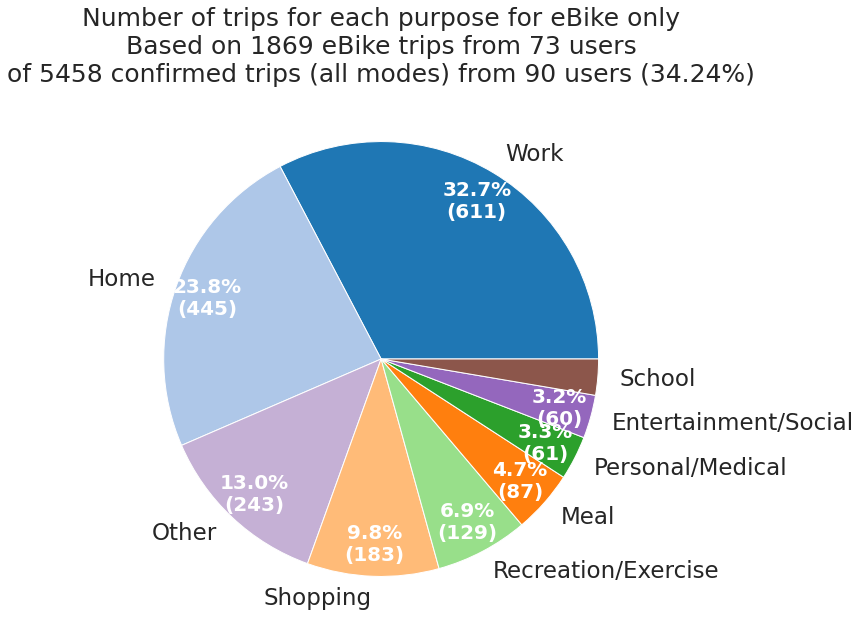

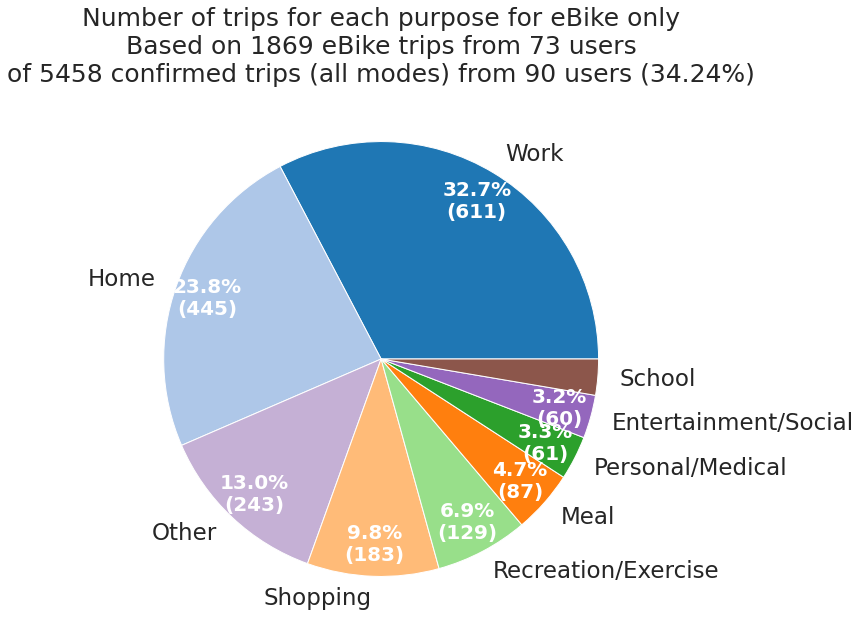

In [26]:
labels_tp = data_eb['Trip_purpose'].value_counts(dropna=True).keys().tolist()
values_tp = data_eb['Trip_purpose'].value_counts(dropna=True).tolist()
plot_title="Number of trips for each purpose for eBike only\n%s" % quality_text
file_name= 'ntrips_ebike_purpose%s.png' % file_suffix
pie_chart_purpose(plot_title,labels_tp,values_tp,file_name)

,vals,pct
"Car, drove alone",717,38.362761
Regular Bike,354,18.940610
Walk,229,12.252541
Bus,166,8.881755
No Travel,145,7.758159
"Car, with others",119,6.367041
Taxi/Uber/Lyft,98,5.243446
Other,32,1.712146
Skate board,8,0.428036
Bikeshare,1,0.053505


,vals,pct
"Car, drove alone",717,38.362761
Regular Bike,354,18.940610
Walk,229,12.252541
Bus,166,8.881755
No Travel,145,7.758159
"Car, with others",119,6.367041
Taxi/Uber/Lyft,98,5.243446
Other,32,1.712146
Skate board,8,0.428036
Bikeshare,1,0.053505


,vals,pct
"Car, drove alone",717,38.362761
Regular Bike,354,18.940610
Walk,229,12.252541
Bus,166,8.881755
No Travel,145,7.758159
"Car, with others",119,6.367041
Taxi/Uber/Lyft,98,5.243446


,vals,pct
"Car, drove alone",717,38.362761
Regular Bike,354,18.940610
Walk,229,12.252541
Bus,166,8.881755
No Travel,145,7.758159
"Car, with others",119,6.367041
Taxi/Uber/Lyft,98,5.243446


,vals,pct
"Car, drove alone",717.0,38.362761
Regular Bike,354.0,18.940610
Walk,229.0,12.252541
Bus,166.0,8.881755
No Travel,145.0,7.758159
"Car, with others",119.0,6.367041
Taxi/Uber/Lyft,98.0,5.243446
Other,41.0,2.193686


,vals,pct
"Car, drove alone",717.0,38.362761
Regular Bike,354.0,18.940610
Walk,229.0,12.252541
Bus,166.0,8.881755
No Travel,145.0,7.758159
"Car, with others",119.0,6.367041
Taxi/Uber/Lyft,98.0,5.243446
Other,41.0,2.193686


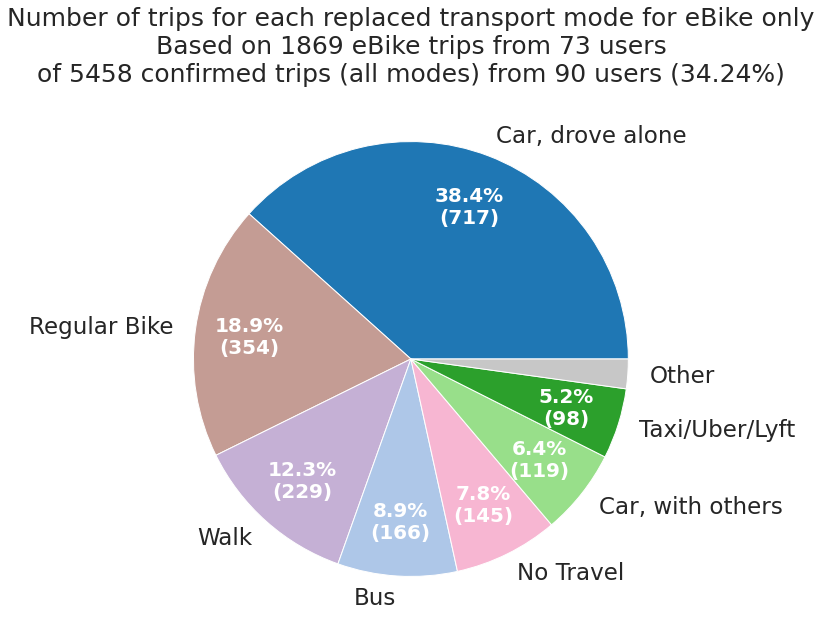

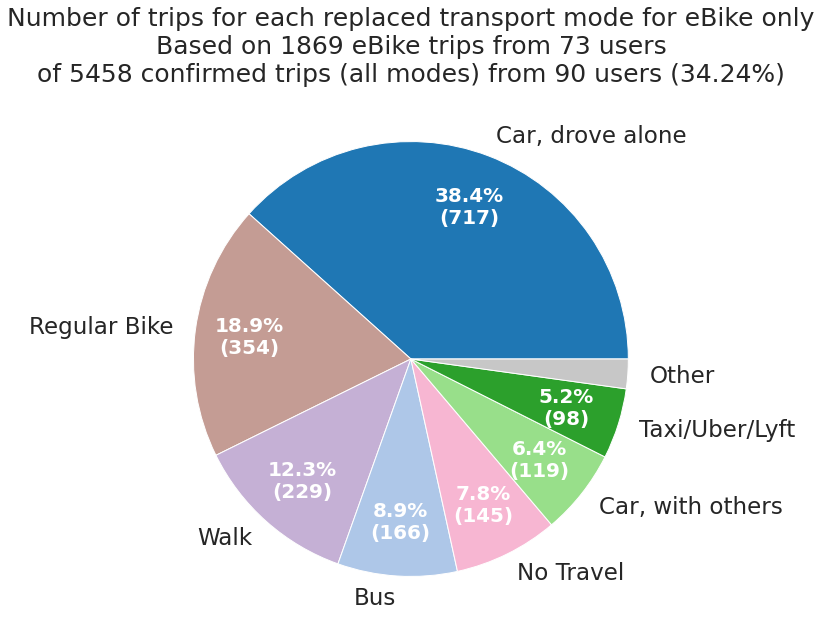

In [27]:
labels_eb = data_eb.Replaced_mode.value_counts(dropna=True).keys().tolist()
values_eb = data_eb.Replaced_mode.value_counts(dropna=True).tolist()
plot_title="Number of trips for each replaced transport mode for eBike only\n%s" % quality_text
file_name ='ntrips_ebike_replaced_mode%s.png' % file_suffix
pie_chart_mode(plot_title,labels_eb,values_eb,file_name)

# Miles replaced_mode by E-bike data only 

,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568
Other,67.311570,1.276201
Skate board,16.371881,0.310405
Bikeshare,3.584911,0.067969


,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568
Other,67.311570,1.276201
Skate board,16.371881,0.310405
Bikeshare,3.584911,0.067969


,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568


,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568


,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568
Other,87.268362,1.654574


,vals,pct
"Car, drove alone",2447.818076,46.409683
Regular Bike,695.982569,13.195560
Bus,567.048325,10.751017
No Travel,559.217342,10.602544
Walk,335.818405,6.366987
Taxi/Uber/Lyft,300.537071,5.698066
"Car, with others",280.679172,5.321568
Other,87.268362,1.654574


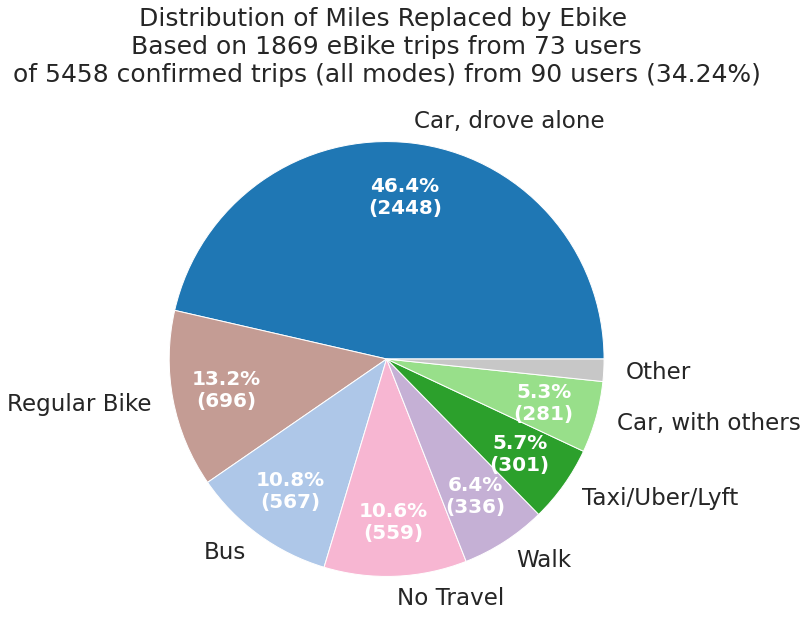

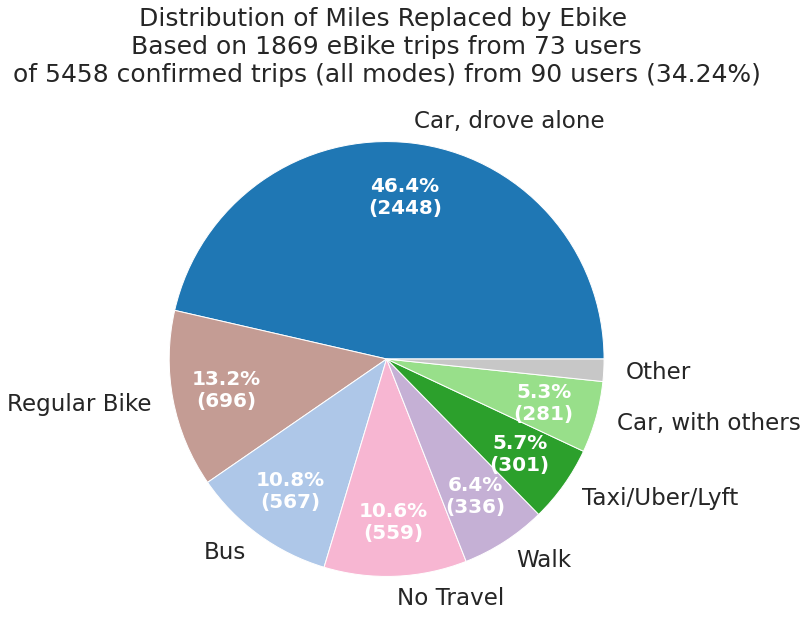

      Replaced_mode  Total (miles)  Count  Average (miles)
2  Car, drove alone    2447.818076    717         3.413972
6      Regular Bike     695.982569    354         1.966052
1               Bus     567.048325    166         3.415954
4         No Travel     559.217342    145         3.856671
9              Walk     335.818405    229         1.466456
8    Taxi/Uber/Lyft     300.537071     98         3.066705
3  Car, with others     280.679172    119         2.358649
5             Other      67.311570     32         2.103487
7       Skate board      16.371881      8         2.046485
0         Bikeshare       3.584911      1         3.584911
      Replaced_mode  Total (miles)  Count  Average (miles)
2  Car, drove alone    2447.818076    717         3.413972
6      Regular Bike     695.982569    354         1.966052
1               Bus     567.048325    166         3.415954
4         No Travel     559.217342    145         3.856671
9              Walk     335.818405    229         1.4664

In [28]:
dg=data_eb.groupby('Replaced_mode').agg({'distance_miles': ['sum', 'count' , 'mean']},)
dg.columns = ['Total (miles)', 'Count' ,'Average (miles)']
dg = dg.reset_index()
dg = dg.sort_values(by=['Total (miles)'], ascending=False)

dg_dict = dict(zip(dg['Replaced_mode'], dg['Total (miles)']))
labels_m = []
values_m = []

for x, y in dg_dict.items():
    labels_m.append(x)
    values_m.append(y)

plot_title="Distribution of Miles Replaced by Ebike \n%s" % quality_text
file_name ='miles_ebike_replaced_mode%s.png' % file_suffix
pie_chart_mode(plot_title,labels_m,values_m,file_name)
print(dg)

# Average Miles per ebike trip

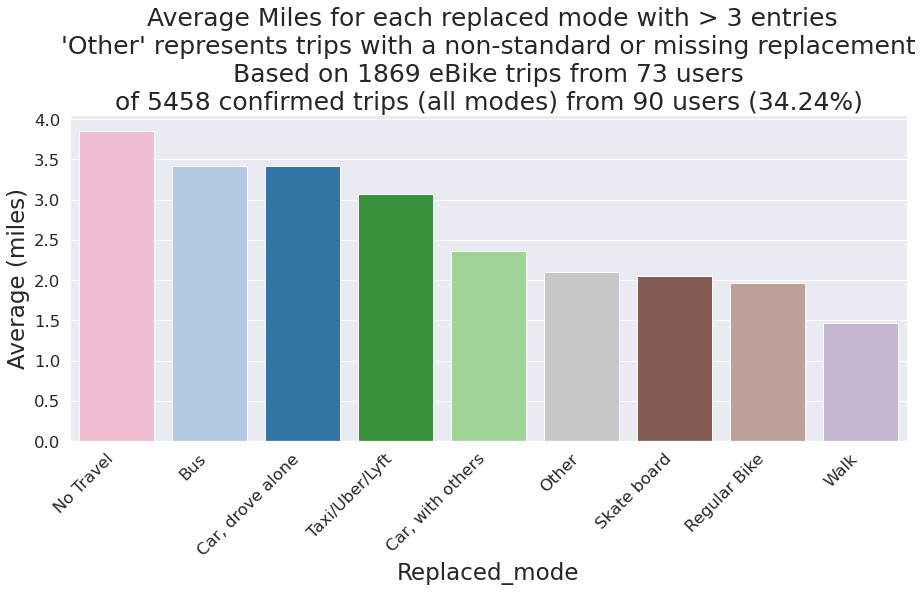

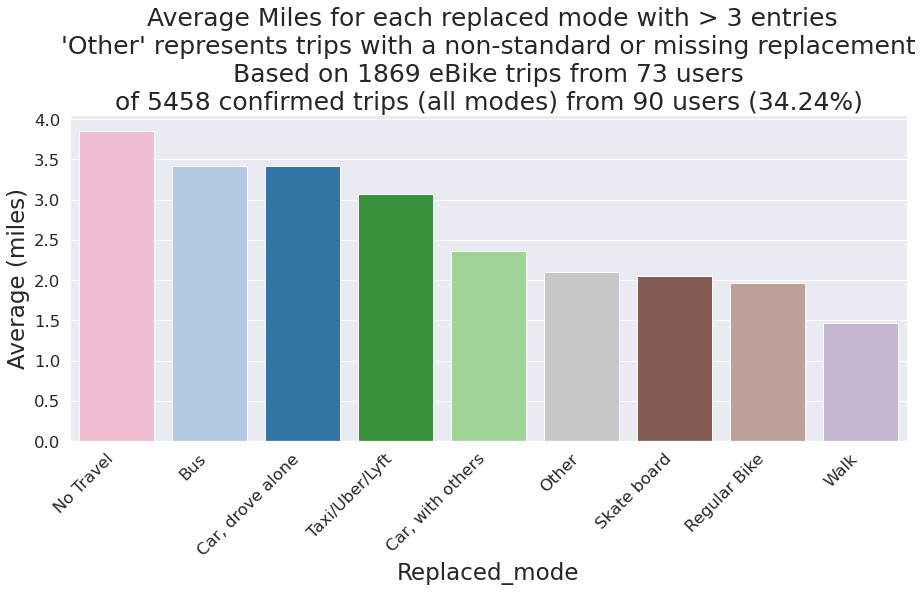

In [29]:
data = dg.drop((dg.query("Count < 3").index)).sort_values(by=['Average (miles)'], ascending=False)
x='Replaced_mode'
y='Average (miles)'
y2 = "Count"

plot_title=" Average Miles for each replaced mode with > 3 entries\n'Other' represents trips with a non-standard or missing replacement\n%s" % quality_text
file_name ='average_miles_replaced_mode%s.png' % file_suffix

barplot_mode(data,x,y,plot_title,file_name)

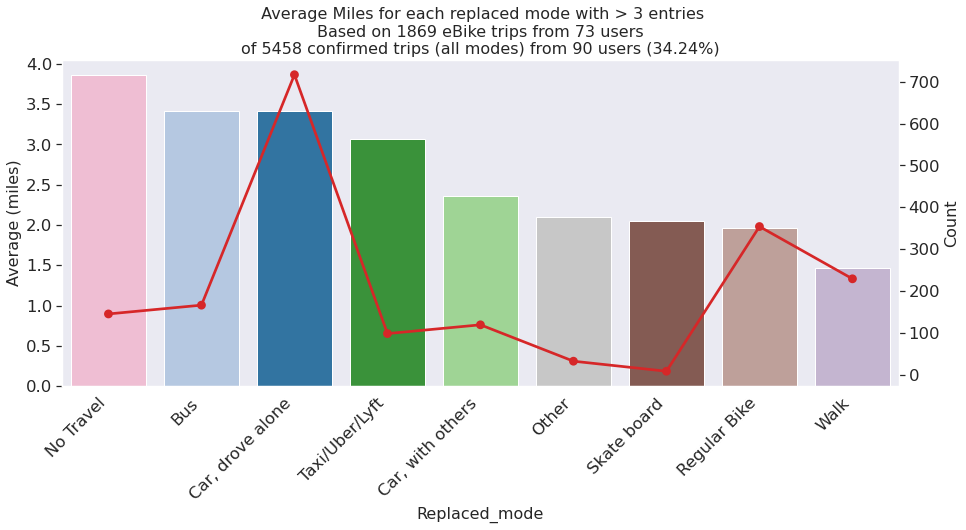

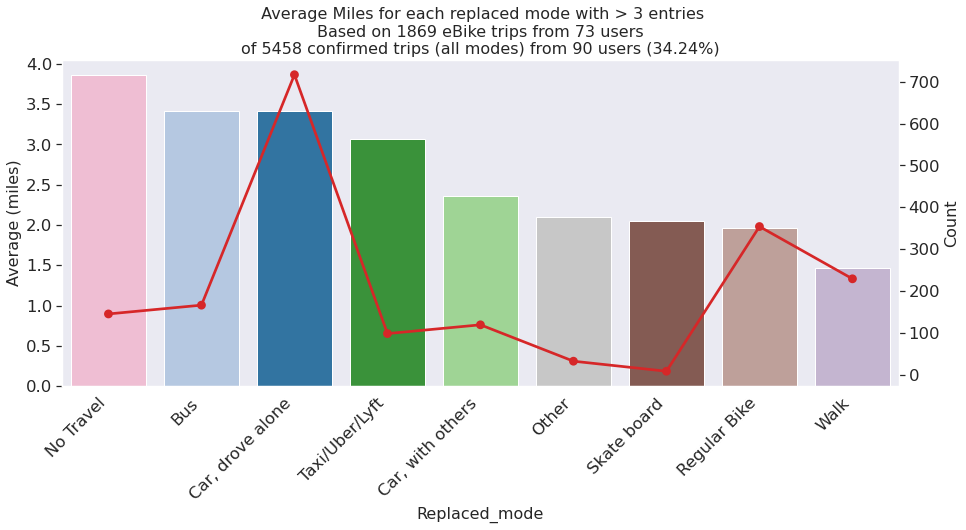

In [30]:
data = dg.drop((dg.query("Count < 3").index)).sort_values(by=['Average (miles)'], ascending=False)
x='Replaced_mode'
y='Average (miles)'
y2 = "Count"

plot_title=" Average Miles for each replaced mode with > 3 entries\n%s" % quality_text
file_name ='average_miles_replaced_mode2%s.png' % file_suffix

barplot_mode2(data,x,y,y2,plot_title,file_name)

# Number of Trips by Day

In [31]:
fq_days = data_eb.groupby(['start_local_dt_day']).agg({'start_local_dt_day': ['sum', 'count']})
fq_days = fq_days.reset_index()
fq_days.columns = ['Day of the Month', 'Total', 'Number of Trips']

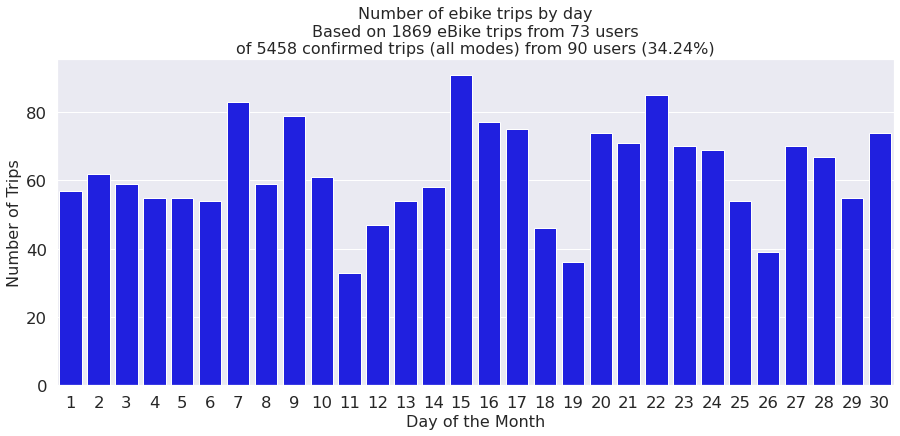

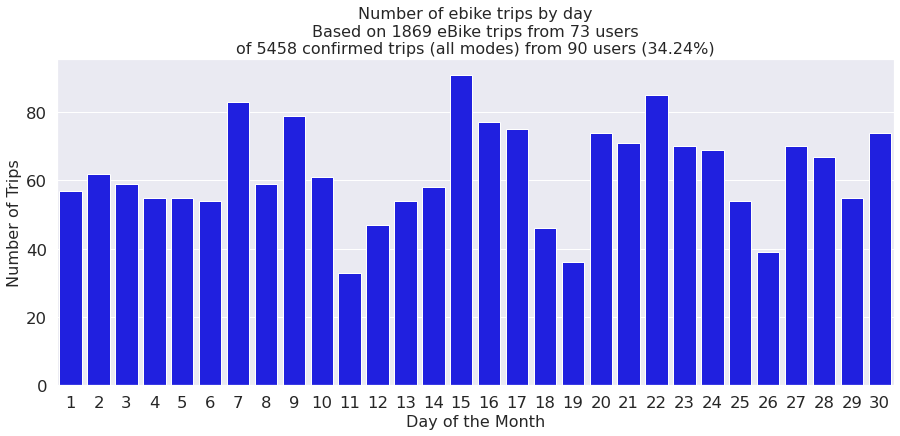

In [32]:
data = fq_days
x = 'Day of the Month'
y = 'Number of Trips'

plot_title="Number of ebike trips by day\n%s" % quality_text
file_name ='ntrips_ebike_per_day%s.png' % file_suffix

barplot_day(data,x,y,plot_title,file_name)

# Number of Trips by day of week¶

In [33]:
fq_weekdays = data_eb.groupby(['start_local_dt_weekday']).agg({'start_local_dt_weekday': ['sum', 'count']})
fq_weekdays = fq_weekdays.reset_index()
fq_weekdays.columns = ['Weekday', 'Total', 'Number of Trips']
weekday_labels = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
fq_weekdays["Weekday"] = fq_weekdays.Weekday.apply(lambda x: weekday_labels[x])
fq_weekdays

,Weekday,Total,Number of Trips
0,Mon,0,252
1,Tue,279,279
2,Wed,694,347
3,Thu,1086,362
4,Fri,1056,264
5,Sat,940,188
6,Sun,1062,177


,Weekday,Total,Number of Trips
0,Mon,0,252
1,Tue,279,279
2,Wed,694,347
3,Thu,1086,362
4,Fri,1056,264
5,Sat,940,188
6,Sun,1062,177


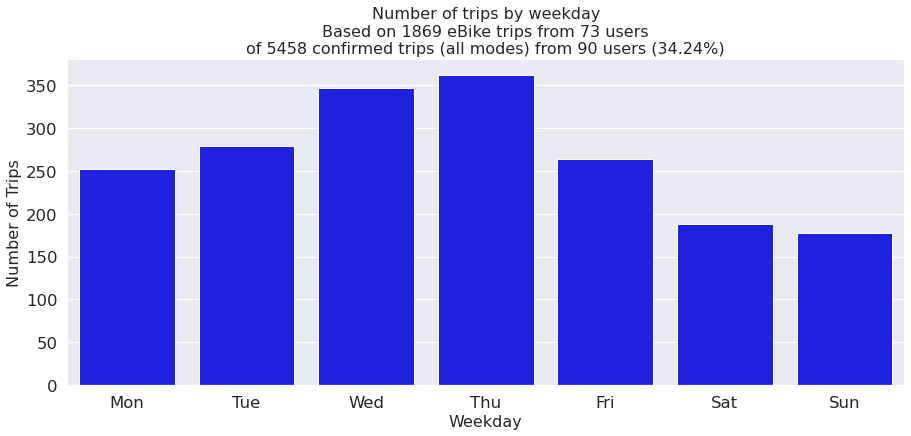

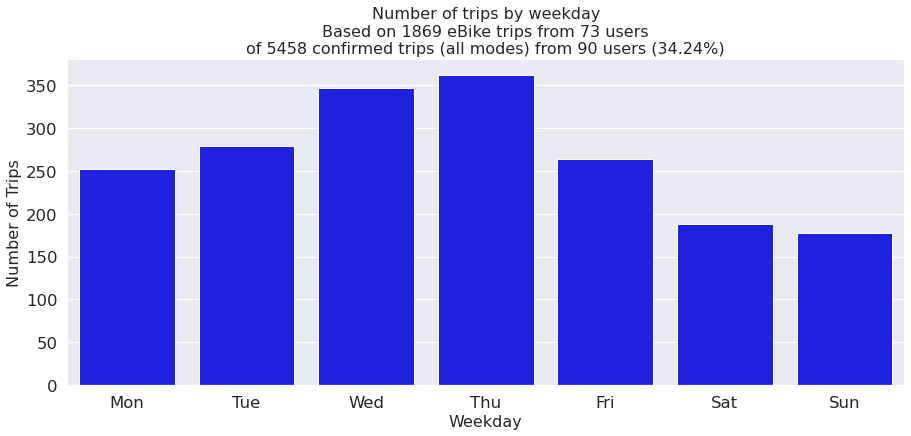

In [34]:
data = fq_weekdays
x = 'Weekday'
y = 'Number of Trips'

plot_title="Number of trips by weekday\n%s" % quality_text
file_name ='ntrips_per_weekday%s.png' % file_suffix

barplot_day(data,x,y,plot_title,file_name)